kaggle linke: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

## Import Libraries

In [96]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import statsmodels.api as sm
from lightgbm import LGBMRegressor
from scipy.stats import norm, skew
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from yellowbrick.regressor import ResidualsPlot

%matplotlib inline

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


## read Data

In [3]:
train = pd.read_csv('../../data/house-prices-advanced-regression-techniques/train.csv')
train.shape

(1460, 81)

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test = pd.read_csv('../../data/house-prices-advanced-regression-techniques/test.csv')
test.shape

(1459, 80)

In [6]:
train = train.drop('Id', axis=1)

In [7]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
train.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

## Univariate Analysis

In [9]:
cat_columns = list(train.select_dtypes(include=['object']).columns)
len(cat_columns)

43

In [10]:
num_columns = list(train.select_dtypes(include=['int64', 'float64']).columns)
len(num_columns)

37

In [11]:
num_columns

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [12]:
num_columns.remove('SalePrice')

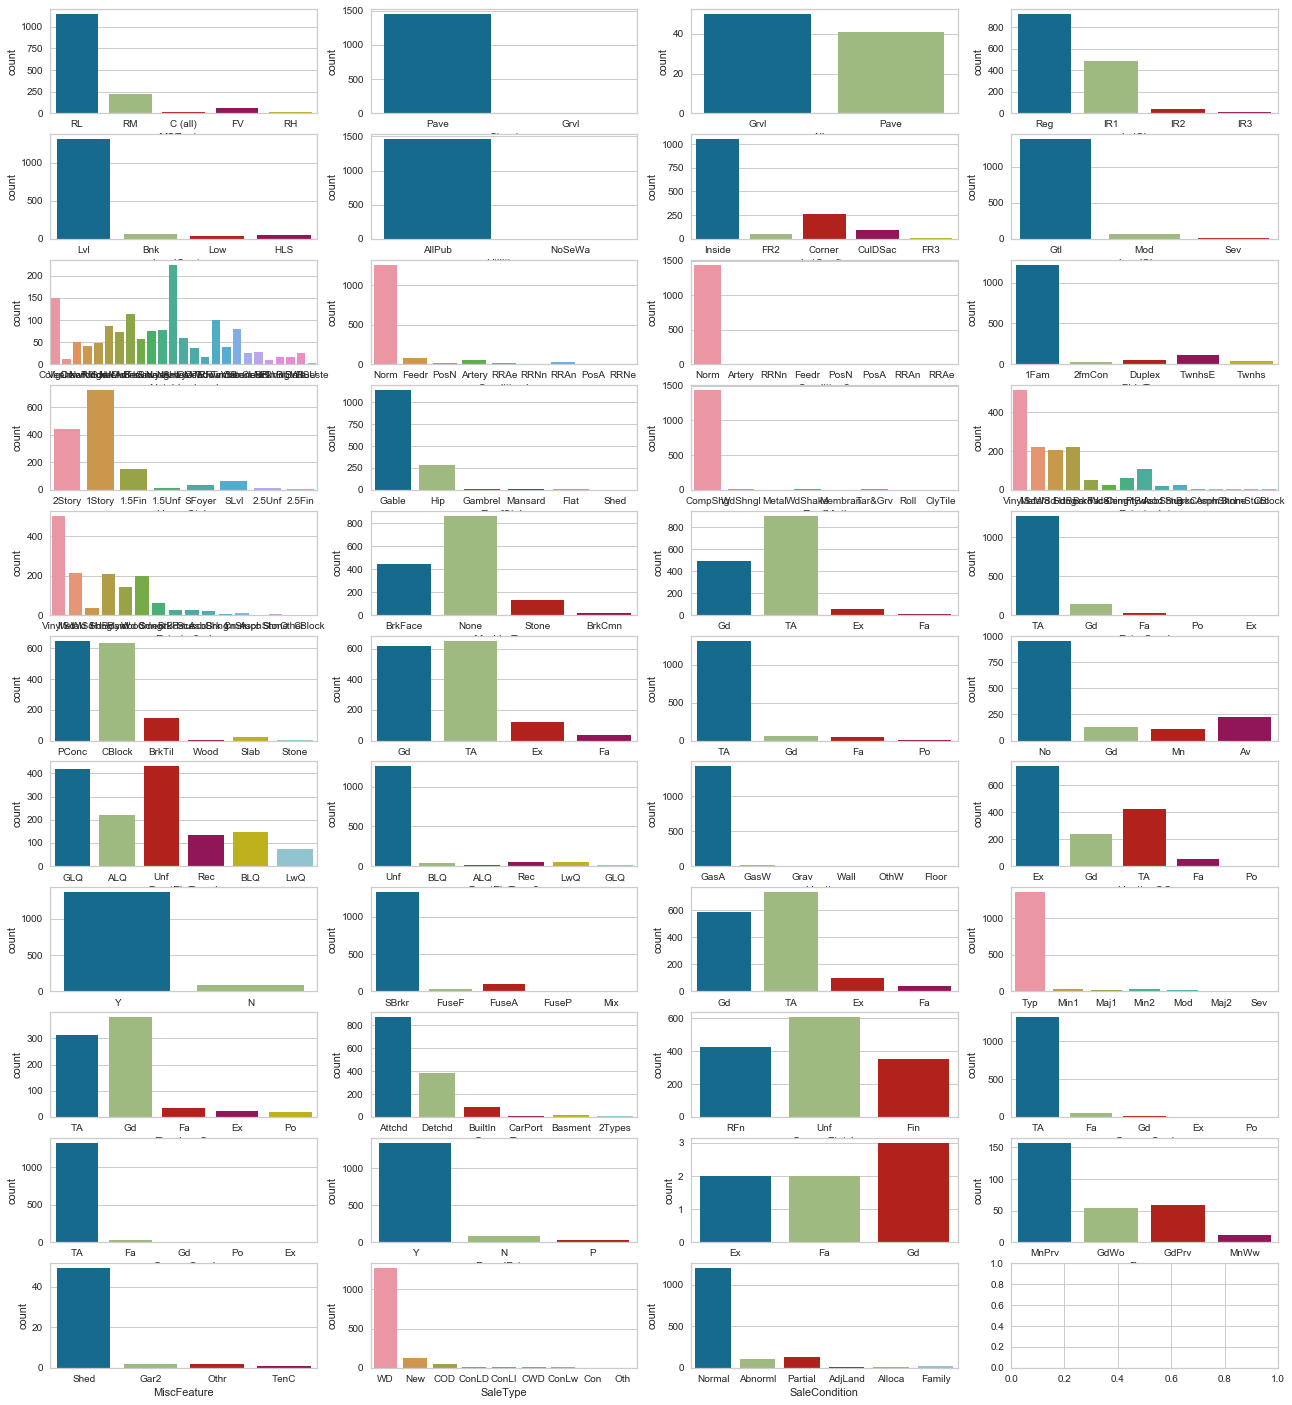

In [13]:

count = 0

fig, ax =plt.subplots(11,4)
fig.set_size_inches(22, 25)
for i in range(0,12):
    for j in range(0,4):
        if count==43:
            break
        sns.countplot(train[cat_columns[count]], ax=ax[i][j])
        count += 1

IndexError: list index out of range

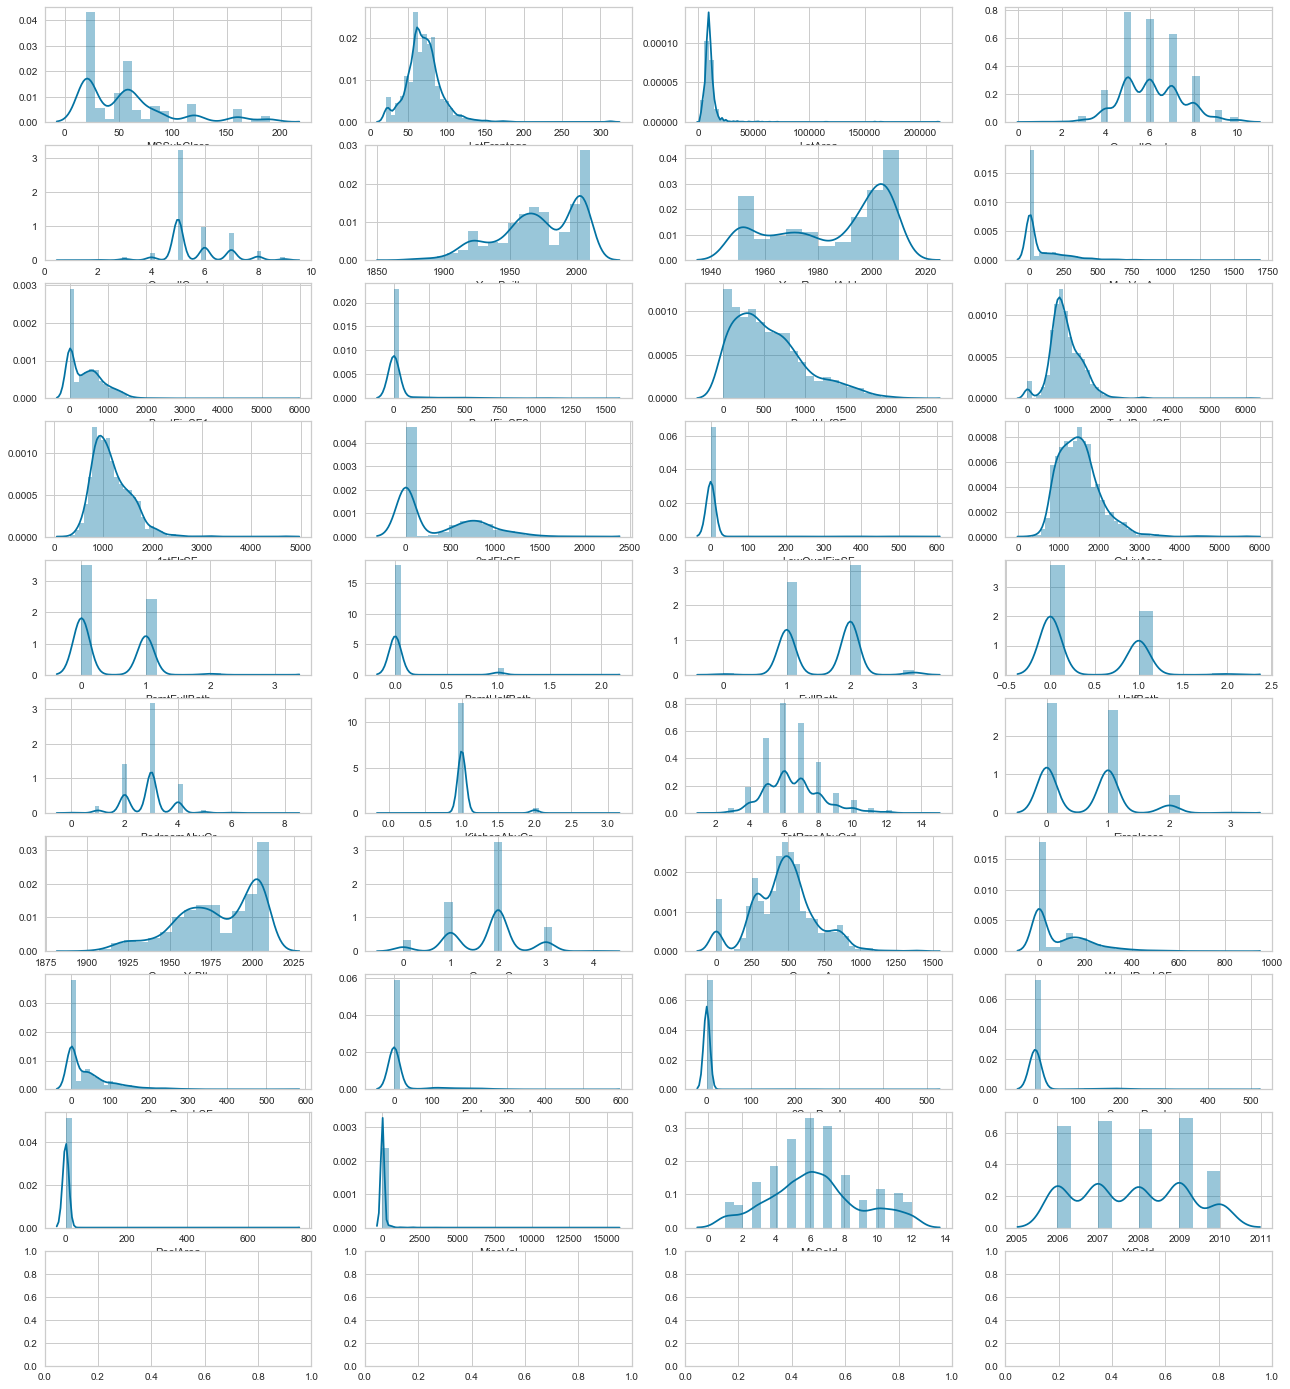

In [14]:
count = 0

fig, ax =plt.subplots(10,4)
fig.set_size_inches(22, 25)
for i in range(0,12):
    for j in range(0,4):
        if count>=37:
            break
        sns.distplot(train[num_columns[count]], ax=ax[i][j])
        count += 1

## Bivariate Analysis

IndexError: list index out of range

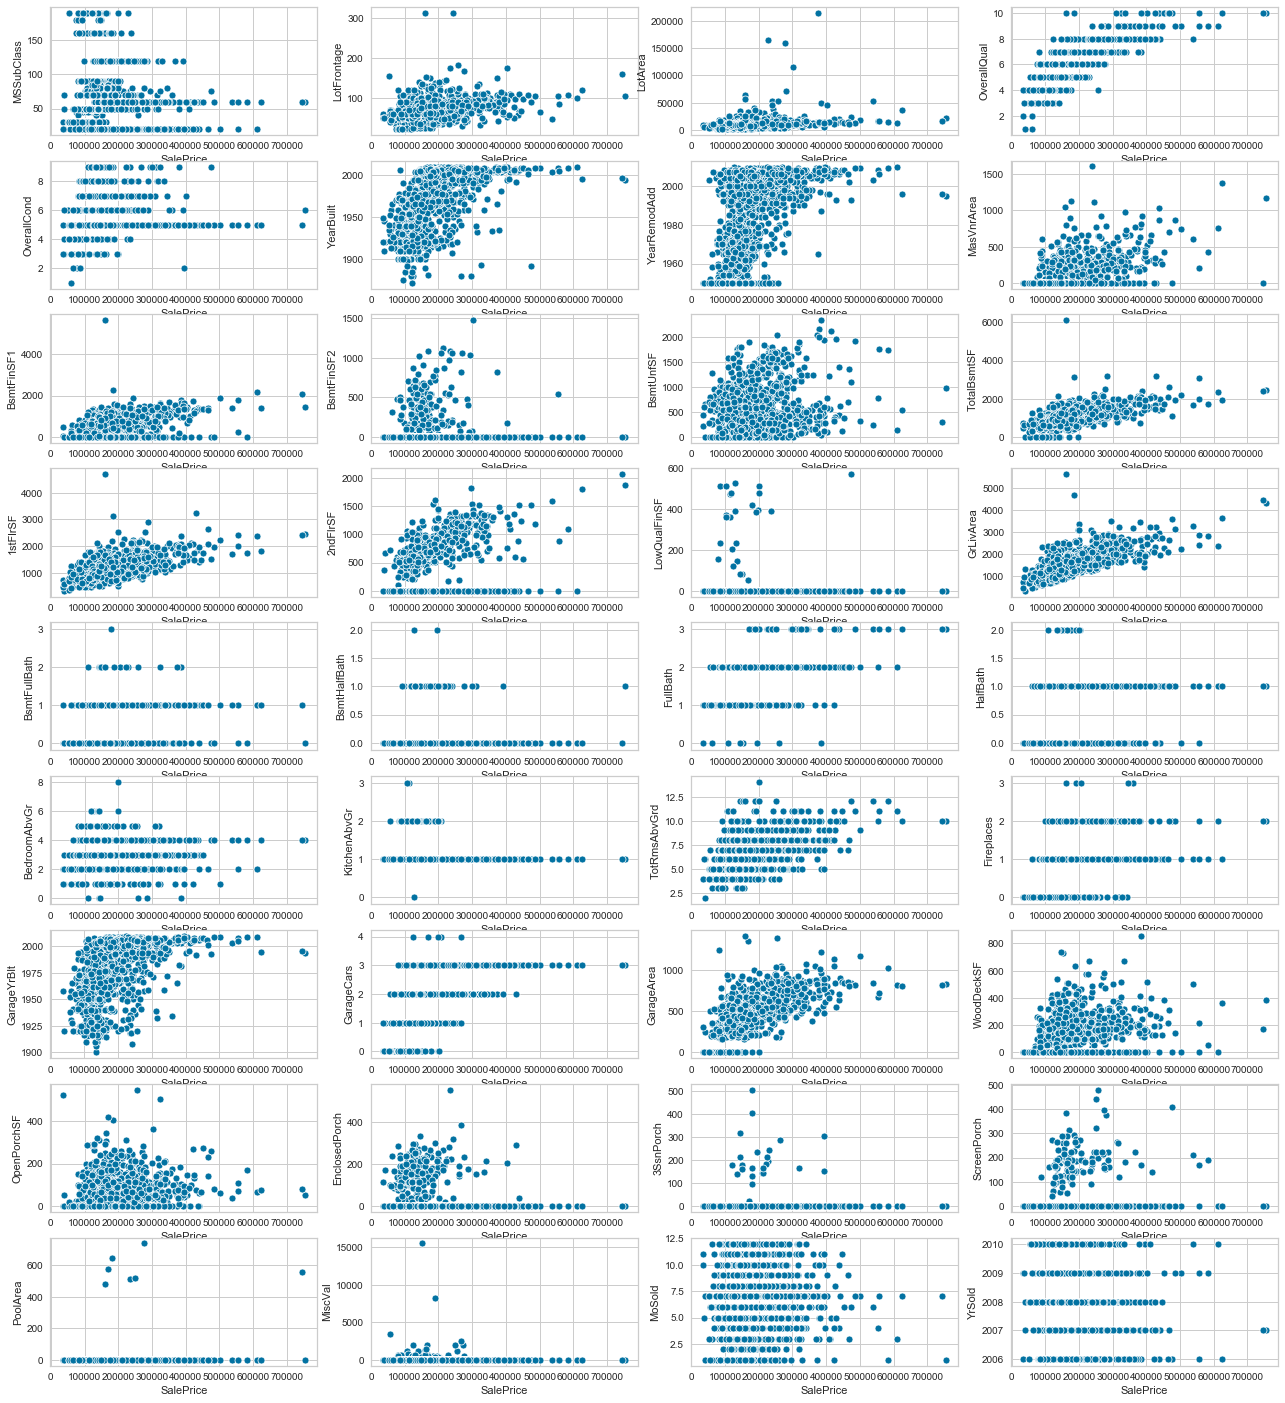

In [17]:
count = 0
fig, ax =plt.subplots(9,4)
fig.set_size_inches(22, 25)
for i in range(0,12):
    for j in range(0,4):
        sns.scatterplot(data = train,x=train['SalePrice'],y=train[num_columns[count]], ax=ax[i][j])
        count += 1

## NUll Value Analysis

In [22]:
train_null = train.isnull().sum().sort_values(ascending=False)
train_null = train_null[train_null>0]
train_null = train_null/train.shape[0]*100
train_null

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtCond         2.534247
BsmtQual         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

Text(0.5, 1.0, 'Feature v/s Null Percentage')

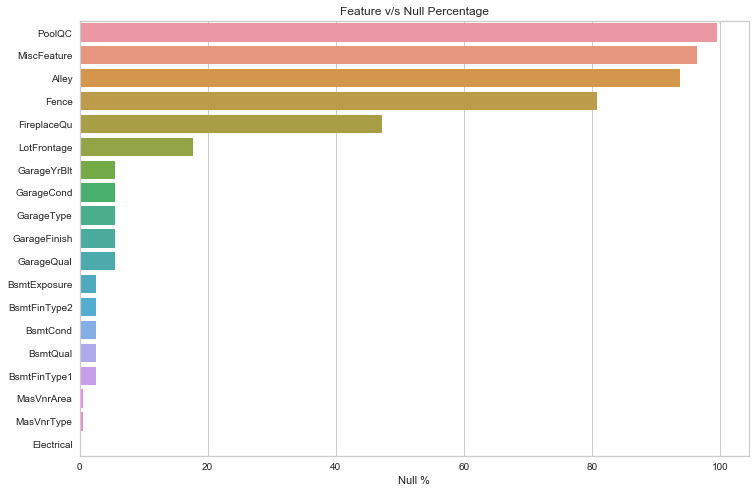

In [23]:
plt.figure(figsize=(12,8))
sns.barplot(train_null.values, train_null.index)
plt.xlabel('Null %')
plt.title('Feature v/s Null Percentage')

We can drop columns with high percentage of null values. Here we will dropo features having null percentage greater than 20%:

    PoolQC
    MiscFeature
    Alley
    Fence
    FireplaceQu


In [24]:
def drop_null_columns(threshold, df):
    null_df = df.isnull().sum().sort_values(ascending=False)
    null_df = null_df[null_df>0]
    null_df = null_df/df.shape[0]*100
    remove_col = list(null_df[null_df>20].index)
    df = df.drop(remove_col, axis=1)
    return df

In [25]:
train = drop_null_columns(20, train)

In [26]:
train.shape

(1460, 75)

In [27]:
cat_columns = list(train.select_dtypes(include=['object']).columns)
len(cat_columns)

38

In [28]:
num_columns = list(train.select_dtypes(include=['int64', 'float64']).columns)
len(num_columns)

37

In [29]:
num_columns.remove('SalePrice')

## Numerical Features Analysis

In [30]:
## find numerical column which are highly correlated
high_corr_num=train[num_columns].corrwith(train['SalePrice'])[train[num_columns].corrwith(train['SalePrice']).abs()>0.5].index
X_num=train[high_corr_num]


In [31]:
X_num.shape

(1460, 10)

In [32]:
X_num.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea'],
      dtype='object')

In [33]:
print("Correlation of Each feature with target")
X_num.corrwith(train['SalePrice'])

Correlation of Each feature with target


OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
dtype: float64

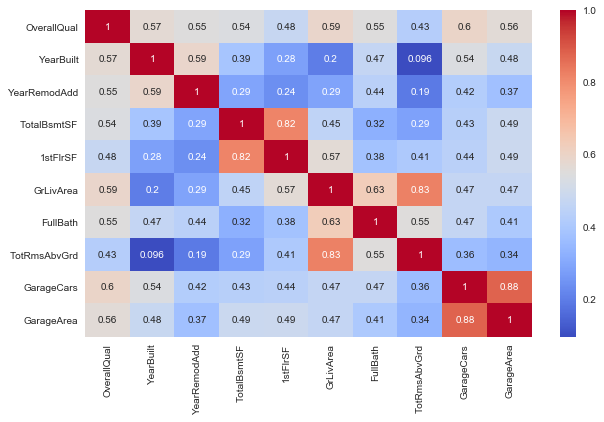

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(X_num.corr(), annot=True, cmap='coolwarm')
plt.show()

### Remove multi-colinear features using VIF (Variance Inflation Factor)

In [35]:
X_num.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea'],
      dtype='object')

In [36]:
vif_df = pd.DataFrame()
vif_df['features'] = X_num.columns
vif_df['VIF Factor'] = [variance_inflation_factor(X_num.values,i) for i in range(X_num.shape[1])]

In [37]:
vif_df

,features,VIF Factor
0,OverallQual,48.259362
1,YearBuilt,8160.729383
2,YearRemodAdd,8011.544572
3,TotalBsmtSF,24.318006
4,1stFlrSF,36.834107
5,GrLivArea,46.000994
6,FullBath,17.882539
7,TotRmsAbvGrd,56.699800
8,GarageCars,34.022038
9,GarageArea,29.078616


In [38]:
X_num=X_num[high_corr_num]
X_num.drop(['YearRemodAdd'],axis=1, inplace=True)

In [39]:
vif_df = pd.DataFrame()
vif_df['features'] = X_num.columns
vif_df['VIF Factor'] = [variance_inflation_factor(X_num.values,i) for i in range(X_num.shape[1])]

In [40]:
vif_df

,features,VIF Factor
0,OverallQual,48.155854
1,YearBuilt,37.183284
2,TotalBsmtSF,23.825037
3,1stFlrSF,36.699405
4,GrLivArea,45.131462
5,FullBath,17.236831
6,TotRmsAbvGrd,56.365797
7,GarageCars,33.584270
8,GarageArea,29.069732


### Handle null values

In [41]:
def handle_na(df, func):
    """
    Input dataframe and function 
    Returns dataframe after filling NA values
    eg: df=handle_na(df, 'mean')
    """
    na_cols=df.columns[df.isna().sum()>0]
    for col in na_cols:
        if func=='mean':
            df[col]=df[col].fillna(df[col].mean())
        if func=='mode':
            df[col]=df[col].fillna(df[col].mode()[0])
    return df

In [42]:
X_num=handle_na(X_num, 'mean')

In [43]:
X_num.shape

(1460, 9)

### Scale Values

In [44]:
# Function to scale df 
def scale_df(df):
    """
    Input: data frame
    Output: Returns minmax scaled Dataframe 
    eg: df=scale_df(df)
    """
    scaler=MinMaxScaler()
    for col in df.columns:
        df[col]=scaler.fit_transform(np.array(df[col]).reshape(-1,1))
    return df

In [45]:
X_num=scale_df(X_num)

## Categorical features analysis

In [46]:
train[cat_columns].shape

(1460, 38)

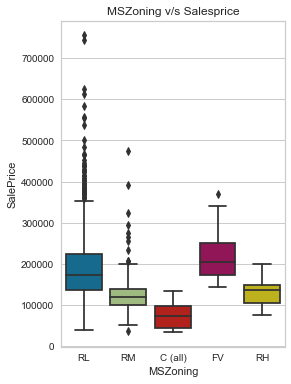

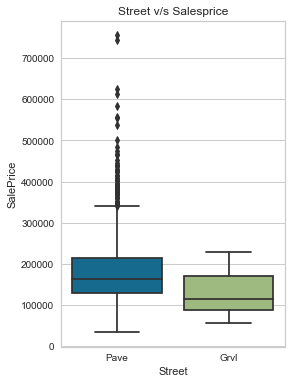

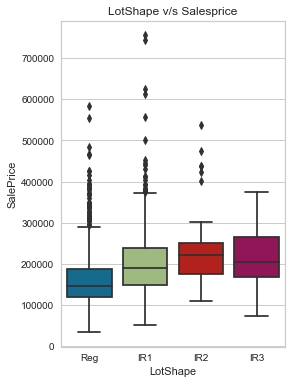

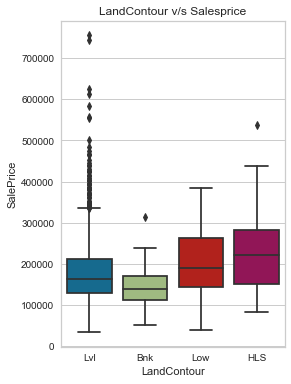

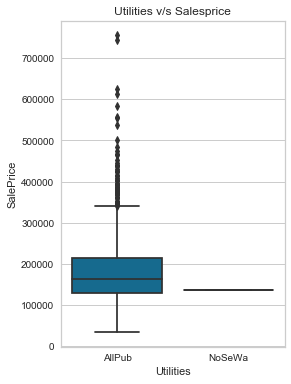

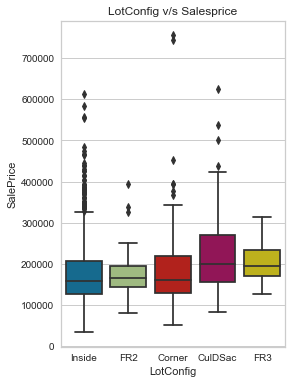

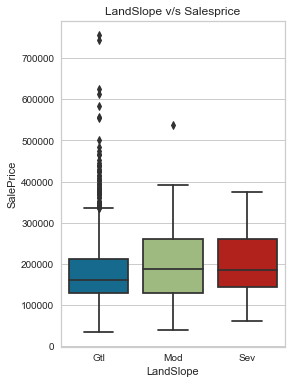

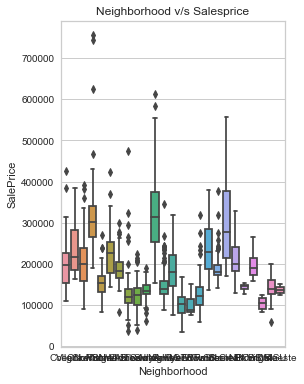

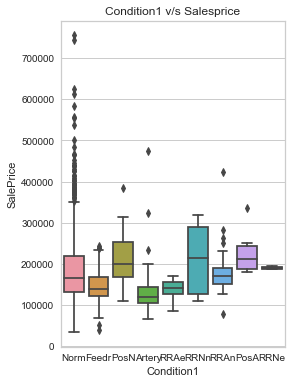

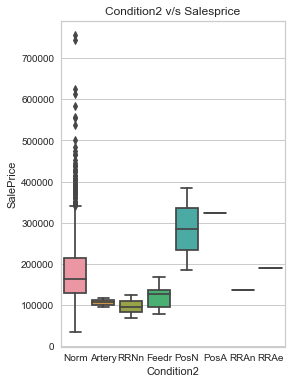

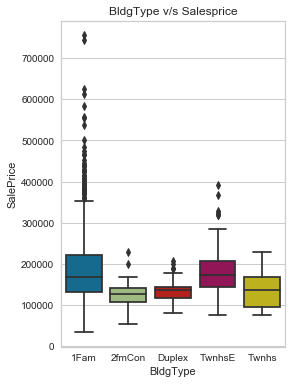

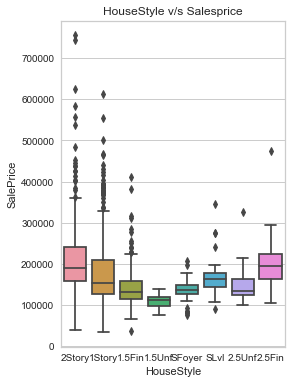

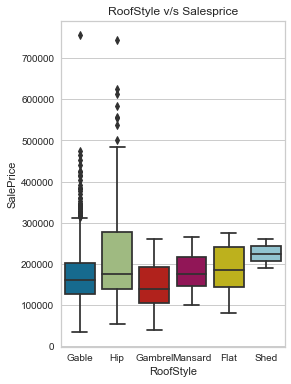

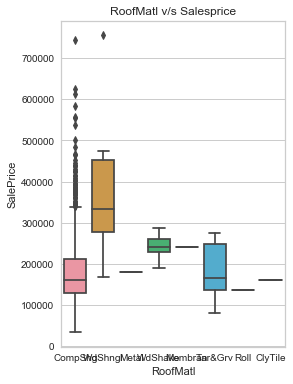

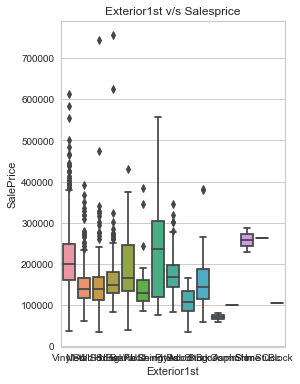

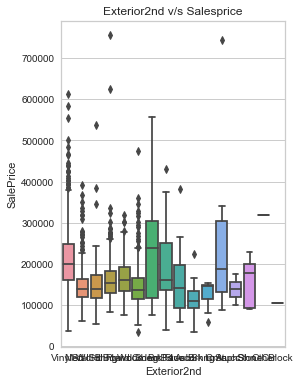

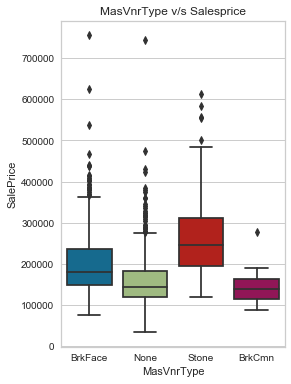

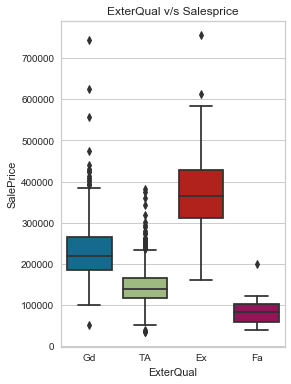

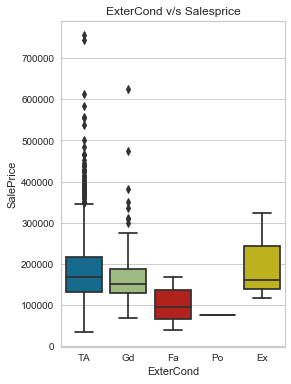

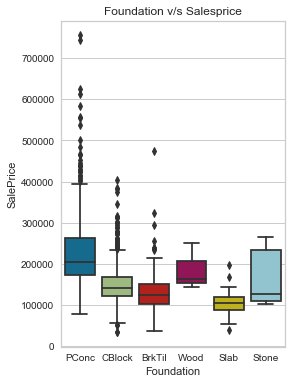

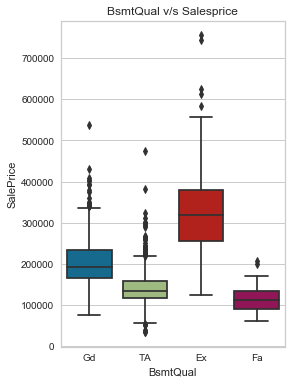

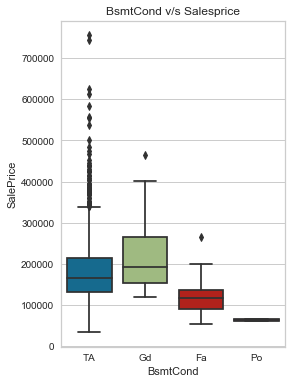

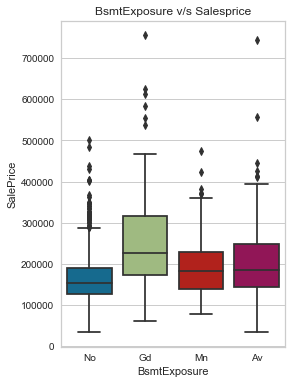

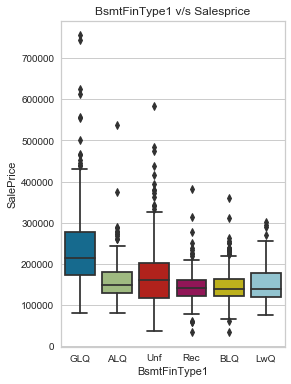

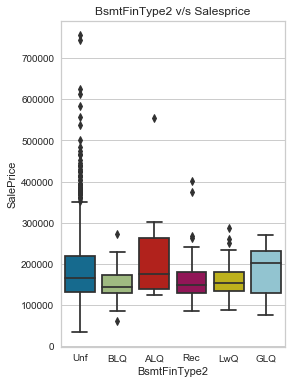

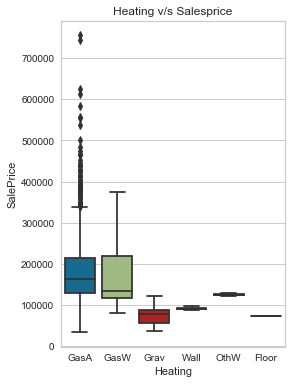

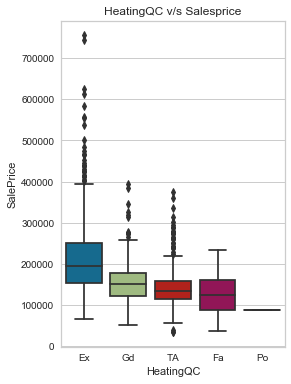

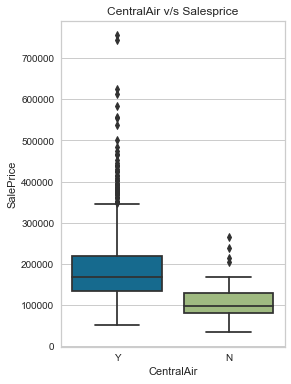

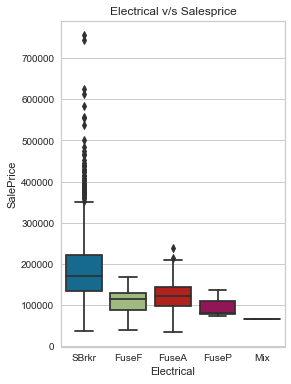

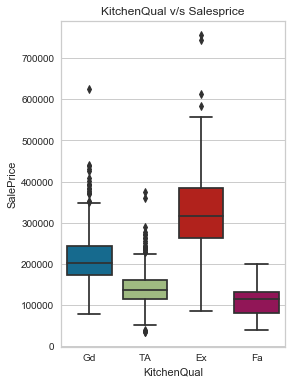

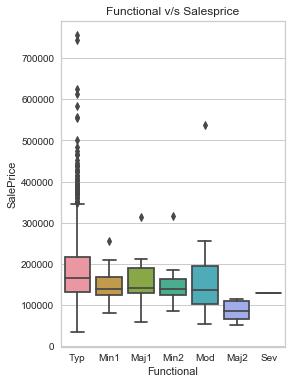

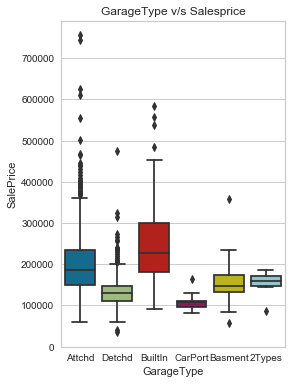

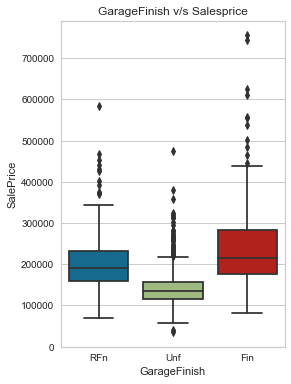

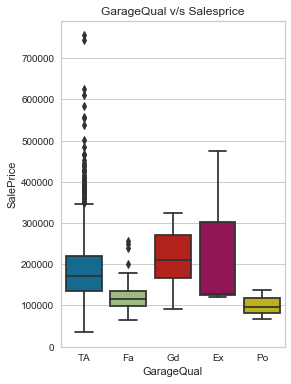

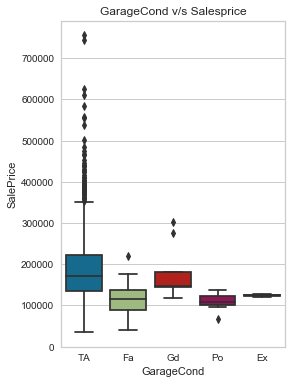

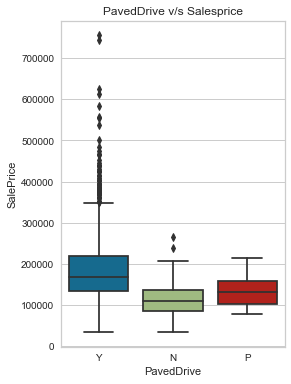

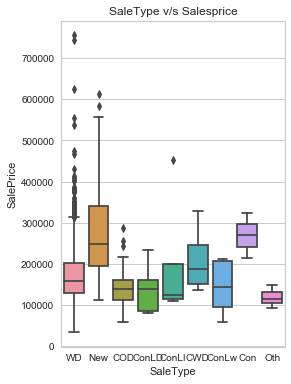

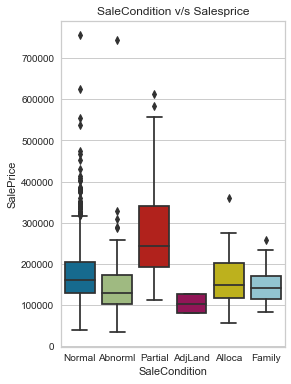

In [47]:
for feature in cat_columns:
    plt.figure(figsize=(4,6))
    plt.title(f'{feature} v/s Salesprice')
    sns.boxplot(train[feature], train['SalePrice'])
    plt.show()

In [48]:
X_cat = handle_na(train[cat_columns], 'mode')

/Users/nehapawar/Desktop/neha/venv3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [49]:
le=LabelEncoder()
X_cat_le=pd.DataFrame()
for col in X_cat.columns:
    X_cat_le[col] = le.fit_transform(X_cat[col])

In [50]:
Xc_train, Xc_test, yc_train,yc_test=train_test_split(X_cat_le,train['SalePrice'], test_size=0.2)

In [51]:
model=RandomForestRegressor()
model.fit(Xc_train,yc_train)

RandomForestRegressor()

In [52]:
print(f"Train score : {model.score(Xc_train,yc_train)}")
print(f"Test score : {model.score(Xc_test,yc_test)}")

Train score : 0.9564128705963293
Test score : 0.7249002441527052


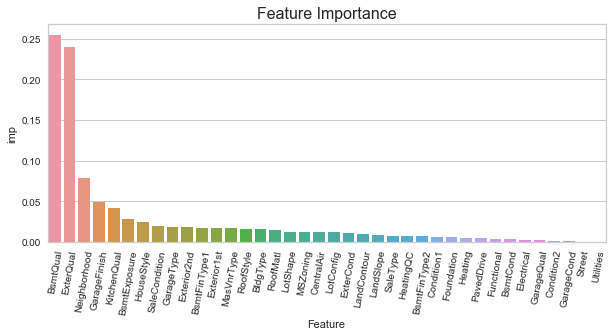

In [53]:
feat_imp=pd.DataFrame({"Feature":Xc_train.columns,"imp":model.feature_importances_})
feat_imp=feat_imp.sort_values('imp', ascending=False)

plt.figure(figsize=(10,4))
plt.title("Feature Importance", fontsize=16)
sns.barplot('Feature', 'imp', data=feat_imp)
plt.xticks(rotation=80)
plt.show()

In [54]:
cat_features=list(feat_imp.iloc[:17,0])

In [55]:
len(cat_features)

17

In [56]:
cat_features

['BsmtQual',
 'ExterQual',
 'Neighborhood',
 'GarageFinish',
 'KitchenQual',
 'BsmtExposure',
 'HouseStyle',
 'SaleCondition',
 'GarageType',
 'Exterior2nd',
 'BsmtFinType1',
 'Exterior1st',
 'MasVnrType',
 'RoofStyle',
 'BldgType',
 'RoofMatl',
 'LotShape']

In [57]:
X_cat=X_cat[cat_features]
# OHE features
X_cat=pd.get_dummies(X_cat)
# Scaling the data
X_cat=scale_df(X_cat)

## 3. Preprocessing

In [58]:
X_num.shape

(1460, 9)

In [59]:
X_num.head()

,OverallQual,YearBuilt,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
0,0.666667,0.949275,0.140098,0.119780,0.259231,0.666667,0.500000,0.50,0.386460
1,0.555556,0.753623,0.206547,0.212942,0.174830,0.666667,0.333333,0.50,0.324401
2,0.666667,0.934783,0.150573,0.134465,0.273549,0.666667,0.333333,0.50,0.428773
3,0.666667,0.311594,0.123732,0.143873,0.260550,0.333333,0.416667,0.75,0.452750
4,0.777778,0.927536,0.187398,0.186095,0.351168,0.666667,0.583333,0.75,0.589563


In [60]:
X_cat.shape

(1460, 128)

In [61]:
X_cat.head()

,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Neighborhood_Blmngtn,Neighborhood_Blueste,...,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [62]:
num_columns = X_num.columns

## ML Model

In [63]:
#Combine train and test data
Xtt=pd.concat([train,test])

In [64]:
#Split into Numeric and categoric features
Xtt_num= Xtt[num_columns]
Xtt_cat= Xtt[cat_features]

In [65]:
#Handling null values
Xtt_cat=handle_na(Xtt_cat, 'mode')
Xtt_num=handle_na(Xtt_num,'mean')

/Users/nehapawar/Desktop/neha/venv3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/nehapawar/Desktop/neha/venv3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [66]:
#OHE Categoric features
Xtt_cat=pd.get_dummies(Xtt_cat,drop_first=True)

In [67]:
#Combine Numeric and Categorical features
Xtt=pd.concat([Xtt_num,Xtt_cat], axis=1)

In [68]:
#Scale Features
Xtt=scale_df(Xtt)

In [69]:
#Training and Testing Features after Feature Engineering
X=Xtt.iloc[:train.shape[0],:]
X_test=Xtt.iloc[train.shape[0]:,:]

In [70]:
X_train, X_val, y_train, y_val=train_test_split(X,train['SalePrice'], test_size=0.2)

### Linear Regression

In [71]:
model=LinearRegression()
model.fit(X_train,y_train)
print(f"Train score : {model.score(X_train,y_train)}")
print(f"Validation score : {model.score(X_val,y_val)}")
y_LR=model.predict(X_test)

Train score : 0.8936916145922879
Validation score : -1.0313006819052624e+23


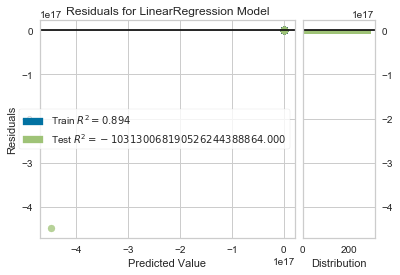

In [73]:
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
visualizer.show() 

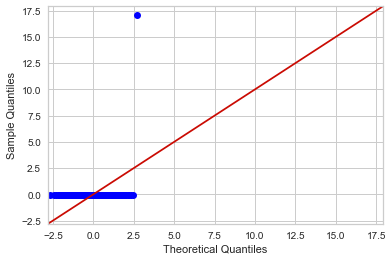

In [74]:
y_test_pred = model.predict(X_val)
diff= y_val-y_test_pred

sm.qqplot(diff,fit=True,line='45')
plt.show()

### Lasso Regression (L1 Regularization)

In [77]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
print(f"Train score : {lasso_model.score(X_train,y_train)}")
print(f"Validation score : {lasso_model.score(X_val,y_val)}")
y_Lasso=lasso_model.predict(X_test)

Train score : 0.8936723946629727
Validation score : 0.8790033241595445


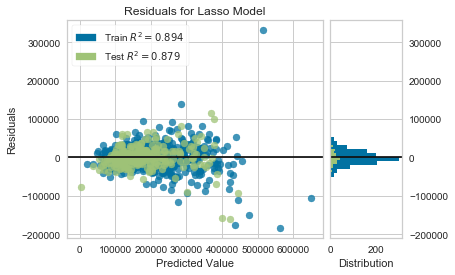

In [80]:
visualizer = ResidualsPlot(lasso_model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
visualizer.show() 

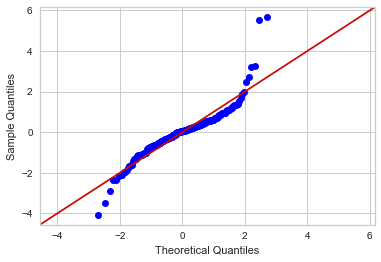

In [82]:
y_test_pred = lasso_model.predict(X_val)
diff= y_val-y_test_pred

sm.qqplot(diff,fit=True,line='45')
plt.show()

### Ridge Regressor (L2 Regularization)

In [78]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
print(f"Train score : {ridge_model.score(X_train,y_train)}")
print(f"Validation score : {ridge_model.score(X_val,y_val)}")
y_ridge=ridge_model.predict(X_test)

Train score : 0.8711858041610296
Validation score : 0.8837829777684986


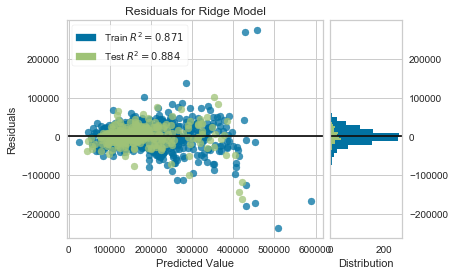

In [84]:
visualizer = ResidualsPlot(ridge_model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
visualizer.show() 

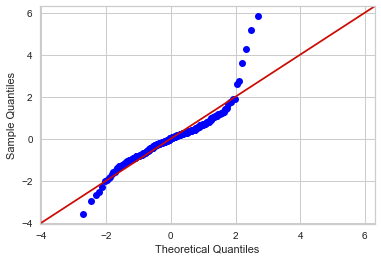

In [83]:
y_test_pred = ridge_model.predict(X_val)
diff= y_val-y_test_pred

sm.qqplot(diff,fit=True,line='45')
plt.show()

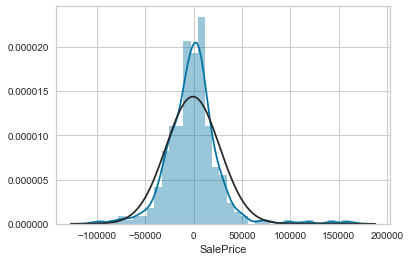

In [89]:
sns.distplot(diff, fit=norm)

### SVM Regressor

In [100]:
model=SVR()
model.fit(X_train,y_train)
print(f"Train score : {model.score(X_train,y_train)}")
print(f"Validation score : {model.score(X_val,y_val)}")
y_SVR=model.predict(X_test)

Train score : -0.04926261343278471
Validation score : -0.05024934301622008


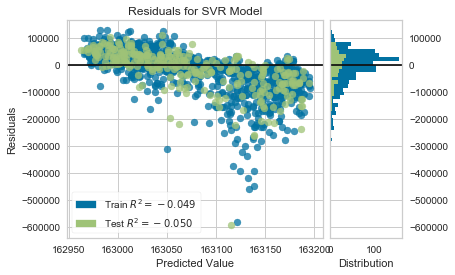

In [73]:
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
visualizer.show() 

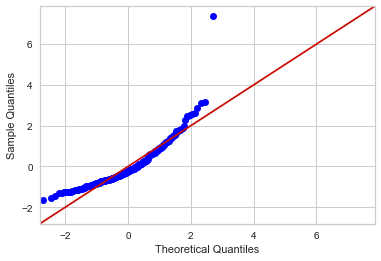

In [87]:
y_test_pred = model.predict(X_val)
diff= y_val-y_test_pred

sm.qqplot(diff,fit=True,line='45')
plt.show()

### XGBoost regressor

In [93]:
model=XGBRegressor(learning_rate=0.1)
model.fit(X_train,y_train)
print(f"Train score : {model.score(X_train,y_train)}")
print(f"Validation score : {model.score(X_val,y_val)}")
y_XGB=model.predict(X_test)

Train score : 0.9899009351052201
Validation score : 0.8739252277267292


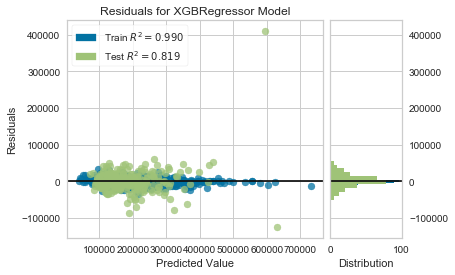

In [75]:
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
visualizer.show() 

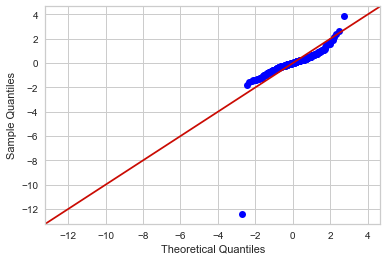

In [89]:
y_test_pred = model.predict(X_val)
diff= y_val-y_test_pred

sm.qqplot(diff,fit=True,line='45')
plt.show()

In [87]:
y_XGB

array([114301.51, 143570.25, 181167.11, ..., 149309.3 , 121915.  ,
       220056.53], dtype=float32)

### LightGBM

In [99]:
model_lightgbm = LGBMRegressor(objective='regression')

In [100]:
model_lightgbm.fit(X_train,y_train)
print(f"Train score : {model_lightgbm.score(X_train,y_train)}")
print(f"Validation score : {model_lightgbm.score(X_val,y_val)}")
y_XGB=model_lightgbm.predict(X_test)

Train score : 0.9603373957321704
Validation score : 0.8580999082244762


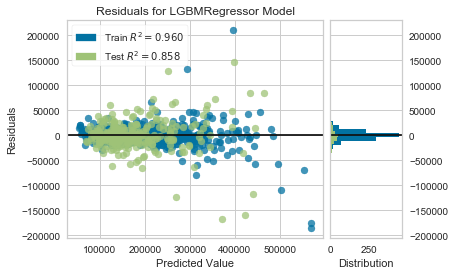

In [101]:
visualizer = ResidualsPlot(model_lightgbm)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
visualizer.show() 

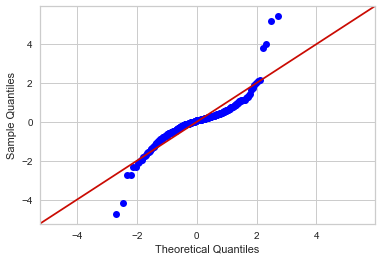

In [102]:
y_test_pred = model_lightgbm.predict(X_val)
diff= y_val-y_test_pred

sm.qqplot(diff,fit=True,line='45')
plt.show()

## Averaging Models

In [ ]:
class AveragingModels():
    def __init__(self, models):
        self.models = models
        
    def fit(self, X, y):
        for model in self.models:
            model.fit(X, y)
            
    def predict(self, X):
        

## Submission 

In [80]:
sub = pd.DataFrame()
sub["Id"] = test.Id
sub["SalePrice"] = list(y_SVR)
sub.to_csv("../../kaggle_out_data/submission_Ahouse_price_SVR.csv", index=False)

In [81]:
sub.head()

,Id,SalePrice
0,1461,163006.807748
1,1462,163037.427165
2,1463,163106.313486
3,1464,163118.206036
4,1465,163125.223638
